In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Análisis

In [4]:
info_vuelos = pd.read_pickle('pkl/info_vuelos.pkl')
info_vuelos.head(3)

,aerolinea,vuelo,origen,destino,fecha_salida,horario_salida,terminal_salida,puerta_salida,fecha_llegada,horario_llegada,terminal_llegada,puerta_llegada
0,Georgian Airways,A9 652,Ámsterdam,Tiflis,"[jueves, 7, marzo]",19:00,-,-,"[viernes, 8, marzo]",02:30,-,-
1,Georgian Airways,A9 652,Ámsterdam,Tiflis,"[sabado, 9, marzo]",10:20,-,-,"[sabado, 9, marzo]",17:50,-,-
2,Georgian Airways,A9 628,París Charles de Gaulle,Tiflis,"[viernes, 8, marzo]",20:20,2D,-,"[sabado, 9, marzo]",03:50,-,-


In [5]:
info_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344124 entries, 0 to 196239
Data columns (total 12 columns):
aerolinea           344124 non-null object
vuelo               334307 non-null object
origen              344124 non-null object
destino             344124 non-null object
fecha_salida        344124 non-null object
horario_salida      344124 non-null object
terminal_salida     344124 non-null object
puerta_salida       344124 non-null object
fecha_llegada       344124 non-null object
horario_llegada     344124 non-null object
terminal_llegada    344124 non-null object
puerta_llegada      344124 non-null object
dtypes: object(12)
memory usage: 34.1+ MB


### Top 10: aerolineas con mayor cantidad de vuelos en marzo

/home/franhermani/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


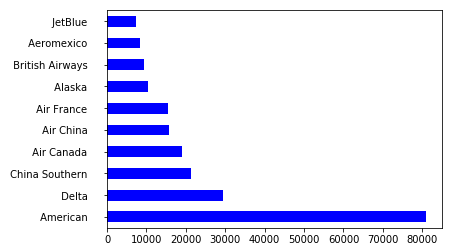

In [6]:
info_vuelos['aerolinea'].value_counts().head(10).plot(kind='barh', colors=['b'])

### Dias vs horas en la que salen vuelos

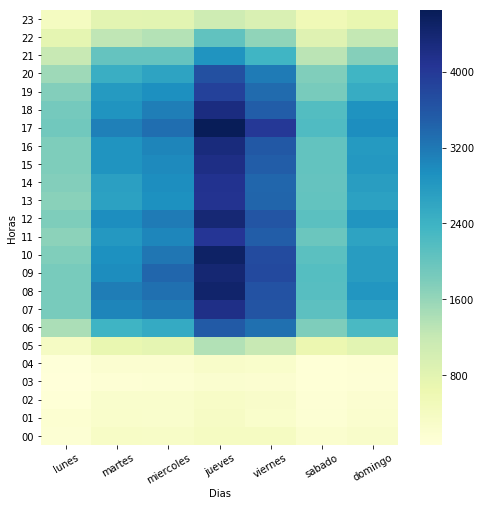

In [7]:
dias = info_vuelos['fecha_salida'].apply(lambda row: row[0]).tolist()
hora = info_vuelos['horario_salida'].apply(lambda row: row.split(':')[0]).tolist()
d = {'dias': dias, 'hora': hora}
d = pd.DataFrame(data=d)
d = pd.get_dummies(d.dias).groupby(d.hora).apply(sum)
d = d[['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']]
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(d, cmap="YlGnBu", yticklabels=True)
ax.invert_yaxis()
ax.set(xlabel='Dias', ylabel='Horas')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

### Destinos mas frecuentes

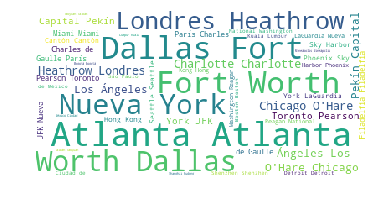

In [10]:
d = info_vuelos['destino'].values.tolist()
text = " ".join(d)
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=50 ,max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Exporto el pkl a csv

In [11]:
info_vuelos.to_csv('csv/info_vuelos.csv', index = None, header = True)

In [12]:
# TO DO: borrarle los espacios de mas que quedan en el csv